In [2]:
#Se crea la matriz
import numpy as np #Numpy
import pandas as pd #Pandas
import matplotlib.pyplot as plt #Matplotlib
import yfinance as yf

In [3]:
#Asginamos los tickers de los instrumentos financieros y con la API de Yahoo finance descargamos los precios ajustados al cierre
tickers = ["TSLA", "AAPL", "KO", "MCD"] #Asignacion de tickers segun la clave de las acciones
matrizpreciosk = pd.DataFrame()
for t in tickers:
    matrizpreciosk[t] = yf.download(t, start = "2020-1-1")["Adj Close"]
matrizpreciosk.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,TSLA,AAPL,KO,MCD
Date,,,,
2020-01-02,28.684000,73.059425,48.147968,182.138748
2020-01-03,29.534000,72.349144,47.885284,181.494705
2020-01-06,30.102667,72.925644,47.867779,183.535751
2020-01-07,31.270666,72.582657,47.500034,183.807861
2020-01-08,32.809334,73.750244,47.587601,186.783157


In [4]:
#Se crea una variable para el cálculo de los rendimientos
rendimientos = (matrizpreciosk - matrizpreciosk.shift(1)) / matrizpreciosk.shift(1)

In [5]:
#Determinamos el número de activos para crear el portafolio
numeroactivos = len(rendimientos.columns)

In [6]:
#Se asignan variables de rendimiento, riesgo y pesos del portafolio
rportafolio = [] #variable rendimiendo del portafolio
sdportafolio = [] #variable desviación estandar (volatilidad) del portafolio
pesosportafolio = [] #pesos del portafolio

In [7]:
#Se crea un lazo for para la asignación de n portafolios
for n in range(10000): #Lazo para 10,000 portafolios
    pesos = np.random.random(numeroactivos) #Pesos aleatorios
    pesos /= np.sum(pesos) #100%
    pesosportafolio.append(pesos)
    rportafolio.append(np.dot(rendimientos.mean(), pesos)) #Cálculo del rendimiento de los portafolios
    sdportafolio.append(np.sqrt(np.dot(pesos.T, np.dot(rendimientos.cov(), pesos)))) 

In [8]:
#Diccionario: rendimiento, volatilidad y pesos
diccionarioportafolio = { "Rendimientos" : rportafolio, "Volatilidad" :sdportafolio}
for contador, ticker in enumerate(rendimientos.columns.tolist()):
    diccionarioportafolio["Peso " + ticker] = [w[contador] for w in pesosportafolio]

<Axes: xlabel='Volatilidad', ylabel='Rendimientos'>

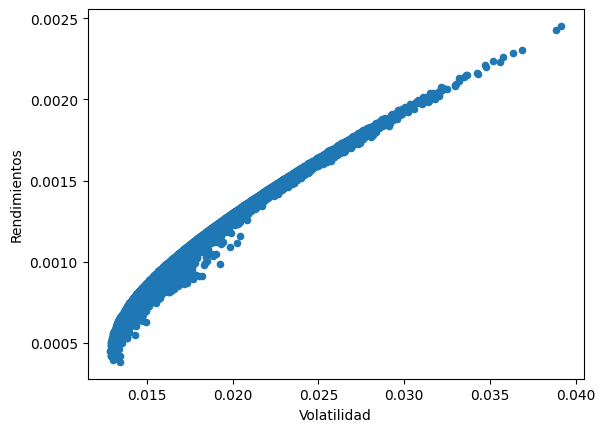

In [9]:
#Convertir el diccionario en DataFrame
matrizportafolios = pd.DataFrame(diccionarioportafolio)
matrizportafolios.plot(x = 'Volatilidad', y = 'Rendimientos', kind = 'scatter')

In [10]:
#Cálculo del portafolio con menor volatilidad
varianzaminima = matrizportafolios.iloc[matrizportafolios["Volatilidad"].idxmin()]

In [11]:
#Cálculo del portafolio óptimo
rf = 0.039 / 12 #Tasa libre de riesgo mensual (generalmente se utiliza la tasa de cetes mensual)
optimo = matrizportafolios.iloc[((matrizportafolios["Rendimientos"] - rf) / matrizportafolios["Volatilidad"]).idxmax()]

C:\Users\gio\AppData\Local\Temp\ipykernel_28016\3488618657.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(x = varianzaminima[1], y = varianzaminima[0], color = "yellow", marker = ".", s = 600)
C:\Users\gio\AppData\Local\Temp\ipykernel_28016\3488618657.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(x = optimo[1], y = optimo[0], color = "red", marker = ".", s = 600)


Portafolio
Rendimientos    0.002453
Volatilidad     0.039137
Peso TSLA       0.905234
Peso AAPL       0.070985
Peso KO         0.013511
Peso MCD        0.010270
Name: 8416, dtype: float64
Estadistica descriptiva
       Rendimientos   Volatilidad     Peso TSLA     Peso AAPL       Peso KO  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.001122      0.018385      0.250243      0.247538      0.251269   
std        0.000293      0.003497      0.140133      0.138347      0.140713   
min        0.000382      0.012852      0.000147      0.000029      0.000004   
25%        0.000906      0.015680      0.141910      0.140439      0.143642   
50%        0.001125      0.017948      0.251768      0.247878      0.249546   
75%        0.001312      0.020393      0.343615      0.337483      0.342628   
max        0.002453      0.039137      0.905234      0.865305      0.903850   

           Peso MCD  
count  10000.000000  
mean       0.250951  
std       

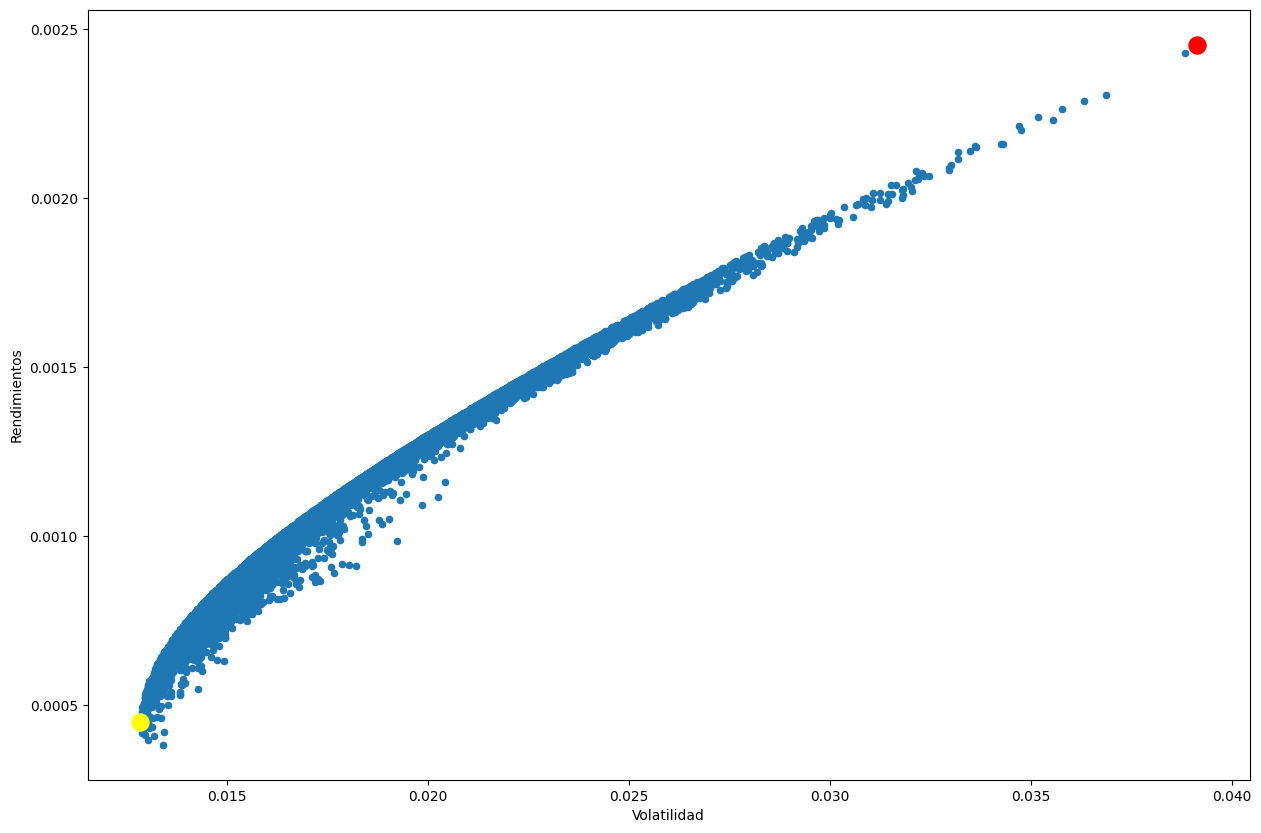

In [13]:
#Grafica: Portafolio con la menor volatilidad y el portafolio óptimo
matrizportafolios.plot(x = "Volatilidad", y = "Rendimientos", kind = "scatter", figsize = (15 , 10))
plt.scatter(x = varianzaminima[1], y = varianzaminima[0], color = "yellow", marker = ".", s = 600)
plt.scatter(x = optimo[1], y = optimo[0], color = "red", marker = ".", s = 600)
print("Portafolio")
print(optimo)
print("Estadistica descriptiva")
print(matrizportafolios.describe())